In [265]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

In [266]:
# reading the files

jan = pd.read_csv(r"C:\Users\nisha\OneDrive\Desktop\Pandas Data Analysis\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_January_2019.csv")
feb = jan = pd.read_csv(r"C:\Users\nisha\OneDrive\Desktop\Pandas Data Analysis\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_February_2019.csv")
mar = jan = pd.read_csv(r"C:\Users\nisha\OneDrive\Desktop\Pandas Data Analysis\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_March_2019.csv")
apr=jan = pd.read_csv(r"C:\Users\nisha\OneDrive\Desktop\Pandas Data Analysis\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_April_2019.csv")
may=jan = pd.read_csv(r"C:\Users\nisha\OneDrive\Desktop\Pandas Data Analysis\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_May_2019.csv")
june=jan = pd.read_csv(r"C:\Users\nisha\OneDrive\Desktop\Pandas Data Analysis\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_June_2019.csv")
july=jan = pd.read_csv(r"C:\Users\nisha\OneDrive\Desktop\Pandas Data Analysis\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_July_2019.csv")
aug=jan = pd.read_csv(r"C:\Users\nisha\OneDrive\Desktop\Pandas Data Analysis\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_August_2019.csv")
sep=jan = pd.read_csv(r"C:\Users\nisha\OneDrive\Desktop\Pandas Data Analysis\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_September_2019.csv")
oct=jan = pd.read_csv(r"C:\Users\nisha\OneDrive\Desktop\Pandas Data Analysis\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_October_2019.csv")
nov=jan = pd.read_csv(r"C:\Users\nisha\OneDrive\Desktop\Pandas Data Analysis\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_November_2019.csv")
dec=jan = pd.read_csv(r"C:\Users\nisha\OneDrive\Desktop\Pandas Data Analysis\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_December_2019.csv")


In [267]:
# merging all months of records into a single data frame

sales = pd.concat([jan,feb,mar,apr,may,june,july,aug,sep,oct,nov,dec],axis=0)

In [268]:
# Cleaning the Data!
# Remove invalid data
sales['month'] = sales['Order Date'].str[:2]
sales = sales[sales['month'] != 'Or']
# sales[sales.isna()] to check the NaN rows
sales = sales.dropna(how= 'all')

# Remove empty rows
sales['month'] = sales['month'].astype('int32')
sales['Quantity Ordered'] = sales['Quantity Ordered'].astype('int32')
sales['Price Each'] = sales['Price Each'].astype('float64')     

# Split Address
sales[['Street','City','StateZip']] = sales['Purchase Address'].str.split(',',expand = True)
sales['State']=sales['StateZip'].str[:3]
sales['Zip']=sales['StateZip'].str[3:]

In [269]:
# Which month had the most sales? How much was the revenue for that month

print("Total Revenue by months:\n")
sales['revenue'] = sales['Quantity Ordered'] * sales['Price Each']
print(sales[['month','revenue']].groupby('month').sum())
print("\nThe highest sales in a month is: \n")
print(sales[['month','revenue']].groupby('month').sum().max())
print("\n The lowest sales in a month is: \n")
print(sales[['month','revenue']].groupby('month').sum().min())


Total Revenue by months:

          revenue
month            
1        17340.58
2      2200273.74
3      2807100.38
4      3390670.24
5      3152606.75
6      2577802.26
7      2647775.76
8      2244467.88
9      2097560.13
10     3736726.88
11     3199603.20
12     9224070.17

The highest sales in a month is: 

revenue    9224070.17
dtype: float64

 The lowest sales in a month is: 

revenue    17340.58
dtype: float64


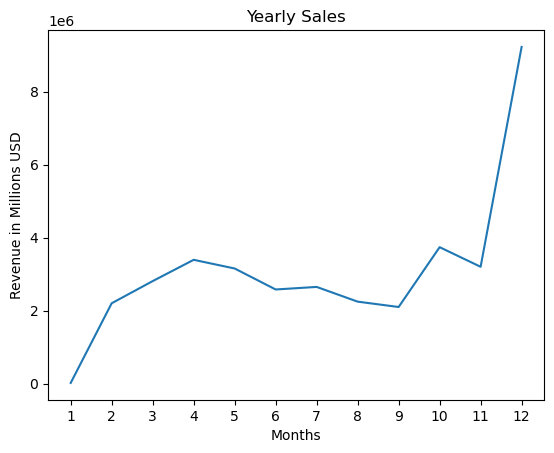

In [270]:
months = range(1,13)
revenue = sales[['month','revenue']].groupby('month').sum()
plt.plot(months,revenue['revenue'])
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Revenue in Millions USD")
plt.title("Yearly Sales")
plt.show()

In [271]:
# Which state has the highest number of sales?

sales['CityState']=sales['City']+" ("+sales['State'].str.strip()+")"
print("Total Revenue by City:\n")
print(sales[['CityState','revenue']].groupby('CityState').sum())
print("\nThe highest sales in a city is: \n")
print(sales[['CityState','revenue']].groupby('CityState').sum().max())
print("\n The lowest sales in a city is: \n")
print(sales[['CityState','revenue']].groupby('CityState').sum().min())

Total Revenue by City:

                        revenue
CityState                      
 Atlanta (GA)        3006844.47
 Austin (TX)         1966271.74
 Boston (MA)         3972691.52
 Dallas (TX)         3006894.13
 Los Angeles (CA)    5848419.86
 New York City (NY)  5052704.27
 Portland (ME)        479015.54
 Portland (OR)       2030505.76
 San Francisco (CA)  8937996.28
 Seattle (WA)        2994654.40

The highest sales in a city is: 

revenue    8937996.28
dtype: float64

 The lowest sales in a city is: 

revenue    479015.54
dtype: float64


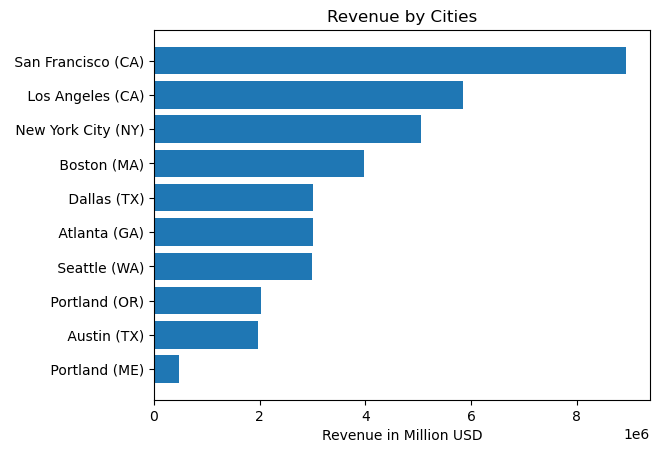

In [272]:
staterev = sales[['CityState','revenue']].groupby('CityState').sum()
staterev_sorted = staterev.sort_values(by='revenue', ascending=True)
plt.barh(staterev_sorted.index, staterev_sorted['revenue'])
plt.xlabel("Revenue in Million USD")
plt.title("Revenue by Cities")
plt.show()

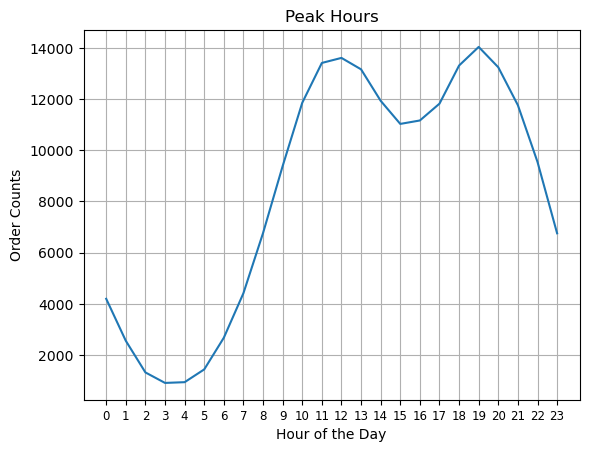

In [273]:
# Which time of the day the customers purchased the most products?

sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['Hours'] = sales['Order Date'].dt.hour
hourcount = sales[['Hours','Order ID']].groupby('Hours').count()
plt.plot(hourcount.index, hourcount)
plt.xticks(hourcount.index,size = 8.5)
plt.grid()
plt.xlabel("Hour of the Day")
plt.ylabel("Order Counts")
plt.title("Peak Hours")
plt.show()

In [274]:
# What products are often sold together?

multiple = sales[sales['Order ID'].duplicated(keep = False)]
grouped=multiple.groupby(['Order ID'])['Product'].transform (lambda x: ', '.join(x))
index = range(0,61913)
group = pd.DataFrame({'No':index,'Product':grouped}) 
combinations_count=group.groupby('Product').count().sort_values(by = 'No',ascending = False)
combinations_count['Product']= combinations_count.index
common = combinations_count[combinations_count['No']<1500]

count = Counter()
for row in common['Product']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

print("The customers are more likeluy to buy these product together!\n")
for key,value in count.most_common(10):
    print(key, value)

The customers are more likeluy to buy these product together!

('Google Phone', ' USB-C Charging Cable') 30
('iPhone', ' Lightning Charging Cable') 28
(' USB-C Charging Cable', ' USB-C Charging Cable') 27
(' Wired Headphones', ' Wired Headphones') 27
(' USB-C Charging Cable', ' Wired Headphones') 24
('Google Phone', ' Wired Headphones') 23
(' Lightning Charging Cable', ' Lightning Charging Cable') 22
(' Bose SoundSport Headphones', ' Bose SoundSport Headphones') 21
('Lightning Charging Cable', ' Lightning Charging Cable') 20
(' Apple Airpods Headphones', ' Apple Airpods Headphones') 19


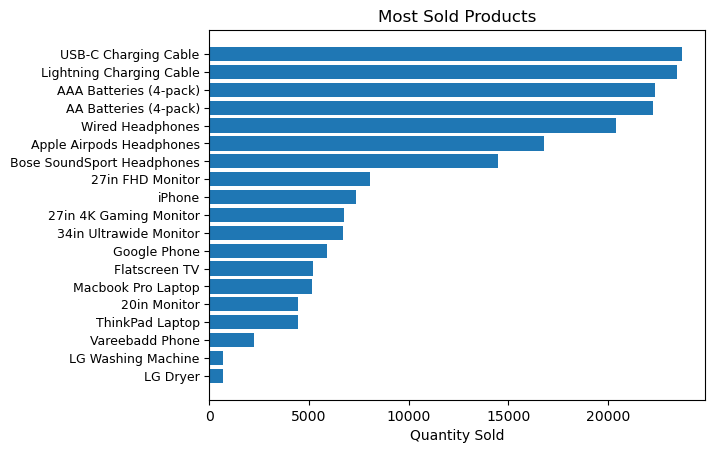

In [275]:
# What product sold the most?

sold = sales[['Product','Order ID']].groupby('Product').count().sort_values(by='Order ID',ascending = True)
plt.barh(sold.index, sold['Order ID'])
plt.xlabel("Quantity Sold")
plt.title("Most Sold Products")
plt.yticks(size=9)
plt.show()
